In [53]:
import numpy as np
import pandas as pd
import sqlite3


In [54]:
con = sqlite3.connect('/Users/jacobcrawford/PycharmProjects/Learn_Web_Scraping/lotto_numbers')

In [55]:
sql_query = pd.read_sql('select date, first, second, third, fourth, fifth from lotto_numbers', con)

In [56]:
# convert sql to DataFrame
df = pd.DataFrame(sql_query, columns=["date", "first", "second", "third", "fourth", "fifth"])

In [57]:
df.median(numeric_only=True)

first      6.0
second    14.0
third     23.0
fourth    32.0
fifth     40.0
dtype: float64

In [58]:
df.mean(numeric_only=True)

first      7.755803
second    15.290012
third     23.068571
fourth    30.657453
fifth     38.320403
dtype: float64

In [59]:
y = df['fourth']

In [60]:
x = df[['first', 'second', 'third', 'fifth']]

In [61]:
from sklearn.model_selection  import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
predictions = lm.predict(X_test)

In [67]:
predictions_as_ints = []
for i in predictions:
    predictions_as_ints.append(i.round())

In [68]:
con.close()

In [69]:
from sklearn.metrics import accuracy_score
accruacy = accuracy_score(y_test, predictions_as_ints)

In [70]:
accruacy

0.10076335877862595

In [71]:
##### PCA RESEARCH  model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [76]:
df_numbers = df.drop(['date'], axis=1)

In [77]:
df_numbers.head()

,first,second,third,fourth,fifth
0,8,15,29,38,40
1,14,29,34,37,43
2,2,3,11,36,38
3,1,11,27,39,43
4,10,16,37,42,43


In [78]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=5)

In [91]:
pca.fit(df_numbers)

PCA(n_components=5)

In [92]:
x_pca = pca.transform(df_numbers)

In [93]:
x_pca.shape

(6548, 5)

Text(0, 0.5, 'Second Principal Component')

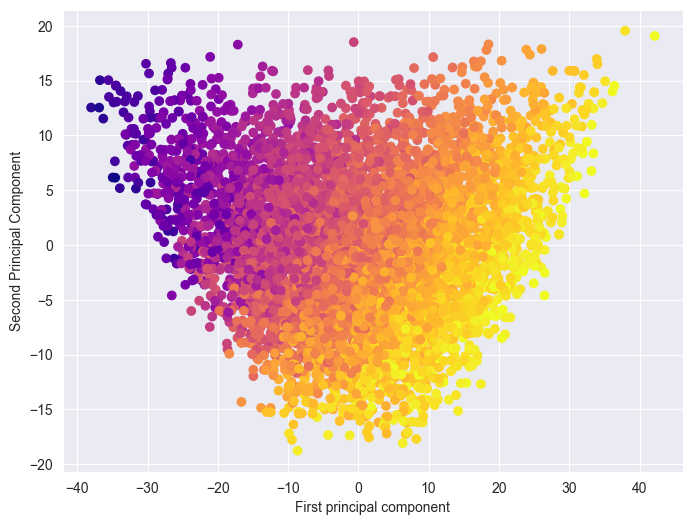

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df_numbers['fourth'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [95]:
pca.components_

array([[ 0.29393795,  0.49127215,  0.57299565,  0.50586385,  0.29669834],
       [ 0.51856627,  0.50325304, -0.01419289, -0.48550413, -0.49184318],
       [ 0.53101832,  0.01545324, -0.58496561, -0.02022402,  0.61252507],
       [-0.52421353,  0.50754104,  0.03852231, -0.50281332,  0.46184095],
       [-0.2964949 ,  0.49754532, -0.57254328,  0.50513093, -0.28561576]])

In [96]:
df_comp = pd.DataFrame(pca.components_,columns=df_numbers.columns)

<Axes: >

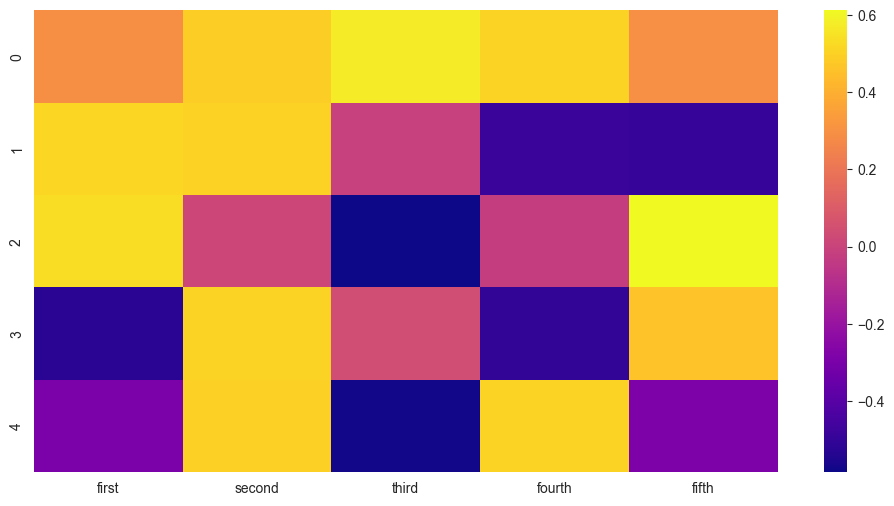

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [98]:
df_comp

,first,second,third,fourth,fifth
0,0.293938,0.491272,0.572996,0.505864,0.296698
1,0.518566,0.503253,-0.014193,-0.485504,-0.491843
2,0.531018,0.015453,-0.584966,-0.020224,0.612525
3,-0.524214,0.507541,0.038522,-0.502813,0.461841
4,-0.296495,0.497545,-0.572543,0.505131,-0.285616


In [99]:
df_numbers.describe()

,first,second,third,fourth,fifth
count,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000
mean,7.755803,15.290012,23.068571,30.657453,38.320403
std,6.093996,7.585310,8.075860,7.693025,6.101827
min,1.000000,2.000000,3.000000,5.000000,11.000000
25%,3.000000,9.000000,17.000000,25.000000,35.000000
50%,6.000000,14.000000,23.000000,32.000000,40.000000
75%,11.000000,20.000000,29.000000,37.000000,43.000000
max,38.000000,42.000000,43.000000,44.000000,45.000000


In [100]:
df_comp.describe()

,first,second,third,fourth,fifth
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.104563,0.403013,-0.112037,0.000491,0.118721
std,0.486141,0.216739,0.484055,0.500000,0.482060
min,-0.524214,0.015453,-0.584966,-0.502813,-0.491843
25%,-0.296495,0.491272,-0.572543,-0.485504,-0.285616
50%,0.293938,0.497545,-0.014193,-0.020224,0.296698
75%,0.518566,0.503253,0.038522,0.505131,0.461841
max,0.531018,0.507541,0.572996,0.505864,0.612525
